By: Doran Wu

Date: 17 Janurary 2018
***
Class: 10.7
***
Teacher: Tracey Sconyers

***
*this is not a full representation of predicting stocks, a simulation
***

# Introduction

I decided to predict stocks for my final because I saw a post on a website for easy coding projects. However, I was wrong, this was the hardest thing to code and understand. Sure I could copy and past all the code froma website, although this might have saved me time I decided to understand and analyze all the code and the steps it took to reach my goal.

So, initially I decided to predict stocks for the Chinese, because of a very detailed tutorial I found. This taught me a little bit of what I needed to do, but I finally decided I wanted to predict stocks from the US, the Standard and Poor's 500 index. The Standard & Poor's 500, often abbreviated as the S&P 500, or just the S&P, is an American stock market index based on the market capitalizations,the value of a company that is traded on the stock market, calculated by multiplying the total number of shares by the present share price, of 500 large companies having common stock listed on the NYSE or NASDAQ. This is a list of all the companies on the index, https://en.wikipedia.org/wiki/List_of_S%26P_500_companies, that's if you really want to look.
***
**About My Data**
- The dataset contains n = 41266 minutes of data ranging from April to August 2017 on 500 stocks as well as the total S&P 500 index price. Index and stocks are arranged in wide format. Their is constant change
***
So let's get started with predicting stocks.

# 1st Step: Importing

In [2]:
def importpackages():
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    import matplotlib.pyplot as pltf
importpackages()
print("""FINISHED IMPORTING SET PACKAGES
- TENSORFLOW
- NUMPY
- PANDAS
- MINMAXSCALER
- MATPLOTLIB""")

FINISHED IMPORTING SET PACKAGES
- TENSORFLOW
- NUMPY
- PANDAS
- MINMAXSCALER
- MATPLOTLIB


*Note: The "as _", is a condensed version of importing packages
***
**Tensor Flow**:
- Using this package to develop my neural networks for predicting the curves and decays of stocks
- Guide URL:https://www.tensorflow.org/get_started/get_started
***
**Numpy**:
- Using this package because of the vast pool of functions for computing multi-dimensional arrays, in this case I will be using this to help store data for future use
- An array is a special variable, which can hold more than one value at a time, a regular variable can only hold one value, either a string or number
- Guide URL:http://www.numpy.org/
***
**Pandas**:
- Using pandas to help in my data analysis and manipulation, in this case I will be using pandas to open up my data files and link it with my code
- Guide URL:https://pandas.pydata.org/
***
**MinMaxScaler**
- Using minmaxscaler to help train my data, this sets a certain range of data that I want to train from 0 to any limit
- Guide: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
***
**matplotlib**
- Using this to help visualize my data, helping me create graphs, for this case showing how close I got to the actual numbers
- Guide URL:https://matplotlib.org/

# 2nd Step: Importing the Data

In [3]:
def importdata():
    data = pd.read_csv('Final Datasets/data_stocks.csv')
importdata()
print("FINISHED IMPORTING DATA")

FINISHED IMPORTING DATA


- created a folder with my final datasets, and the dataset I want exists in there

# 3rd Step: Preparing the Dataset

In [2]:
def preparedata():
    # Drop date variable
    data = data.drop(['DATE'], 1)
    n = data.shape[0]
    # Dimensions of dataset
    p = data.shape[1]
    # Make data a np.array
    data = data.values
preparedata():
print("FINISHED PREPARING THE DATA")

FINISHED PREPARING THE DATA


The data was already cleaned and prepared, meaning missing stock and index prices were LOCF’ed (last observation carried forward), so that the file did not contain any missing values. I created a numpy array for later, so the data can be manipulated and trained.



# 4th Step: Organizing Training and Test Data

In [1]:
# Training and test data
def trainingdata():
    train_start = 0
    train_end = int(np.floor(0.8*n))
    test_start = train_end + 1
    test_end = n
    data_train = data[np.arange(train_start, train_end), :]
    data_test = data[np.arange(test_start, test_end), :]
trainingdata()
print("FINISHED SPLITTING THE DATA")


FINISHED TRAINING THE DATA


The dataset was split into training and test data. The training data contained 80% of the total dataset. The data was not shuffled but sequentially sliced. The training data ranges from April to approx. end of July 2017, the test data ends end of August 2017. There are a lot of different approaches to time series cross validation, such as rolling forecasts with and without refitting or more elaborate concepts such as time series bootstrap resampling. The latter involves repeated samples from the remainder of the seasonal decomposition of the time series in order to simulate samples that follow the same seasonal pattern as the original time series but are not exact copies of its values.

# 5th Step: Scaling the Data

In [2]:
def scalingthedata():
    # Scale data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data_train)
    data_train = scaler.transform(data_train)
    data_test = scaler.transform(data_test)
    # Build X and y
    X_train = data_train[:, 1:]
    y_train = data_train[:, 0]
    X_test = data_test[:, 1:]
    y_test = data_test[:, 0]
    # Number of stocks in training data
    n_stocks = X_train.shape[1]
scalingthedata()
print("FINISHED DATA SCALING")

FINISHED DATA SCALING


Most neural network architectures benefit from scaling the inputs (sometimes also the output). Why? Because most common activation functions of the network’s neurons such as tanh or sigmoid are defined on the [-1, 1] or [0, 1] interval respectively. Nowadays, rectified linear unit (ReLU) activations are commonly used activations which are unbounded on the axis of possible activation values. However, we will scale both the inputs and targets anyway. Scaling can be easily accomplished in Python using sklearn’s MinMaxScaler.Caution must be undertaken regarding what part of the data is scaled and when. A common mistake is to scale the whole dataset before training and test split are being applied. Why is this a mistake? Because scaling invokes the calculation of statistics e.g. the min/max of a variable. When performing time series forecasting in real life, you do not have information from future observations at the time of forecasting. Therefore, calculation of scaling statistics has to be conducted on training data and must then be applied to the test data. Otherwise, you use future information at the time of forecasting which commonly biases forecasting metrics in a positive direction.

# 6th Step: Modeling 

In [3]:
def modelingdata():
    # Neurons
    n_neurons_1 = 1024
    n_neurons_2 = 512
    n_neurons_3 = 256
    n_neurons_4 = 128
    # Session
    net = tf.InteractiveSession()
    #Layer 1: Variables for hidden weights and biases
    W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
    bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
    # Layer 2: Variables for hidden weights and biases
    W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
    bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
    # Layer 3: Variables for hidden weights and biases
    W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
    bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
    # Layer 4: Variables for hidden weights and biases
    W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
    bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))
    # Output layer: Variables for output weights and biases
    W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
    bias_out = tf.Variable(bias_initializer([n_target]))
modelingdata()
print("FINISHED MODELING THE DATA")

FINISHED MODELING THE DATA


Besides placeholders, variables are another cornerstone of the TensorFlow universe. While placeholders are used to store input and target data in the graph, variables are used as flexible containers within the graph that are allowed to change during graph execution. Weights and biases are represented as variables in order to adapt during training. Variables need to be initialized, prior to model training. We will get into that a litte later in more detail.

The model consists of four hidden layers. The first layer contains 1024 neurons, slightly more than double the size of the inputs. Subsequent hidden layers are always half the size of the previous layer, which means 512, 256 and finally 128 neurons. A reduction of the number of neurons for each subsequent layer compresses the information the network identifies in the previous layers. Of course, other network architectures and neuron configurations are possible but are out of scope for this introduction level article.

It is important to understand the required variable dimensions between input, hidden and output layers. As a rule of thumb in multilayer perceptrons (MLPs, the type of networks used here), the second dimension of the previous layer is the first dimension in the current layer for weight matrices. This might sound complicated but is essentially just each layer passing its output as input to the next layer. The biases dimension equals the second dimension of the current layer’s weight matrix, which corresponds the number of neurons in this layer.

# 7th Step: Placeholders

In [ ]:
def placeholders():
    # Placeholder
    X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
    Y = tf.placeholder(dtype=tf.float32, shape=[None])
placeholders()

As mentioned before, it all starts with placeholders. We need two placeholders in order to fit our model: X contains the network's inputs (the stock prices of all S&P 500 constituents at time T = t) and Y the network's outputs (the index value of the S&P 500 at time T = t + 1).

The shape of the placeholders correspond to [None, n_stocks] with [None] meaning that the inputs are a 2-dimensional matrix and the outputs are a 1-dimensional vector. It is crucial to understand which input and output dimensions the neural net needs in order to design it properly.

The None argument indicates that at this point we do not yet know the number of observations that flow through the neural net graph in each batch, so we keep if flexible. We will later define the variable batch_size that controls the number of observations per training batch.

# 8th Step: Designing Network Architecture

In [ ]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

After definition of the required weight and bias variables, the network topology, the architecture of the network, needs to be specified. Hereby, placeholders (data) and variables (weighs and biases) need to be combined into a system of sequential matrix multiplications.

Furthermore, the hidden layers of the network are transformed by activation functions. Activation functions are important elements of the network architecture since they introduce non-linearity to the system. There are dozens of possible activation functions out there, one of the most common is the rectified linear unit (ReLU) which will also be used in this model.



# 9th Step: Computing Deviation

In [ ]:
mse = tf.reduce_mean(tf.squared_difference(out, Y))

The cost function of the network is used to generate a measure of deviation between the network’s predictions and the actual observed training targets. For regression problems, the mean squared error (MSE) function is commonly used. MSE computes the average squared deviation between predictions and targets. Basically, any differentiable function can be implemented in order to compute a deviation measure between predictions and targets. The closer to 0 the MSE is the closer the prediction is to the actual target.



# 10th Step: Setting up Optimizers

In [ ]:
opt = tf.train.AdamOptimizer().minimize(mse)

The optimizer takes care of the necessary computations that are used to adapt the network’s weight and bias variables during training. Those computations invoke the calculation of so called gradients, that indicate the direction in which the weights and biases have to be changed during training in order to minimize the network’s cost function. The development of stable and speedy optimizers is a major field in neural network an deep learning research.

Here the Adam Optimizer is used, which is one of the current default optimizers in deep learning development. Adam stands for “Adaptive Moment Estimation” and can be considered as a combination between two other popular optimizers AdaGrad and RMSProp.

# 11th Step: Setting up Initializers

In [ ]:
net.run(tf.global_variables_initializer())

Initializers are used to initialize the network’s variables before training. Since neural networks are trained using numerical optimization techniques, the starting point of the optimization problem is one the key factors to find good solutions to the underlying problem. There are different initializers available in TensorFlow, each with different initialization approaches. 


# 12th Step: Training and Testing

/Users/doranwu/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


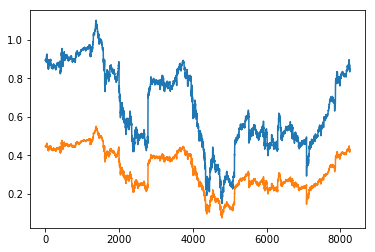

MSE Test:  2.23984
[2.2398365]
MSE Test:  0.061133
[2.2398365, 0.061133042]
MSE Test:  0.0545168
[2.2398365, 0.061133042, 0.054516785]
NUMBER OF GROUPS TESTED 3
MSE Test:  0.0415222
[2.2398365, 0.061133042, 0.054516785, 0.041522183]
MSE Test:  0.0304434
[2.2398365, 0.061133042, 0.054516785, 0.041522183, 0.030443422]
MSE Test:  0.0355836
[2.2398365, 0.061133042, 0.054516785, 0.041522183, 0.030443422, 0.035583574]
NUMBER OF GROUPS TESTED 6
MSE Test:  0.0344852
[2.2398365, 0.061133042, 0.054516785, 0.041522183, 0.030443422, 0.035583574, 0.034485247]
MSE Test:  0.0291435
[2.2398365, 0.061133042, 0.054516785, 0.041522183, 0.030443422, 0.035583574, 0.034485247, 0.029143497]
MSE Test:  0.0221642
[2.2398365, 0.061133042, 0.054516785, 0.041522183, 0.030443422, 0.035583574, 0.034485247, 0.029143497, 0.022164173]
NUMBER OF GROUPS TESTED 9
MSE Test:  0.0231348
[2.2398365, 0.061133042, 0.054516785, 0.041522183, 0.030443422, 0.035583574, 0.034485247, 0.029143497, 0.022164173, 0.02313482]
MSE Test:  

In [1]:
# Run
epochs = 10
#actually only 9 epochs
mselist = []
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            msenums = mse_test[-1]
            print('MSE Test: ', msenums)
            mselist.append(msenums)
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            print(mselist)
    print('NUMBER OF GROUPS TESTED:',len(mselist))
print("FINISHED TESTING")
print('TOTAL NUMBER OF GROUPS TESTED:',len(mselist))
print('FINAL MSE TEST:',mselist[-1])

After having defined the placeholders, variables, initializers, cost functions and optimizers of the network, the model needs to be trained. Usually, this is done by minibatch training. During minibatch training random data samples of n = batch_size are drawn from the training data and fed into the network. The training dataset gets divided into n / batch_size batches that are sequentially fed into the network. At this point the placeholders X and Y come into play. They store the input and target data and present them to the network as inputs and targets.

A sampled data batch of X flows through the network until it reaches the output layer. There, TensorFlow compares the models predictions against the actual observed targets Y in the current batch. Afterwards, TensorFlow conducts an optimization step and updates the networks parameters, corresponding to the selected learning scheme. After having updated the weights and biases, the next batch is sampled and the process repeats itself. The procedure continues until all batches have been presented to the network. One full sweep over all batches is called an epoch.

The training of the network stops once the maximum number of epochs is reached or another stopping criterion defined by the user applies.

During the training, we evaluate the networks predictions on the test set — the data which is not learned, but set aside — for every 5th batch and visualize it. 

In total I showed 30 groups with the computer telling me the MSE every 30 batches.

# An Accumulated Version

/Users/doranwu/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


FINISHED IMPORTING PACKAGES
FINISHED IMPORTING DATA
FINISHED PREPARING THE DATA
FINISHED SPLITTING THE DATA
FINISHED DATA SCALING
FINISHED MODELING THE DATA
FINISHED SETTING PLACEHOLDERS
FINISHED SETTING INITIALIZERS
FINISHED DESIGNING NETWORK ARCHITECTURE
FINISHED COMPUTING DEVIATIONS
FINISHED SETTING OPTIMIZERS


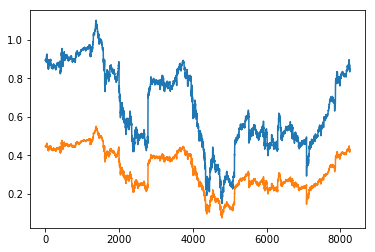

FINISHED PRINTING OUT PRINCIPAL GRAPH
MSE Test 1 : 0.652651
MSE Test 2 : 0.0415704
MSE Test 3 : 0.0241025
NUMBER OF GROUPS TESTED: 3
MSE Test 4 : 0.0225646
MSE Test 5 : 0.0217422
MSE Test 6 : 0.0185042
NUMBER OF GROUPS TESTED: 6
MSE Test 7 : 0.0199071
MSE Test 8 : 0.0167635
MSE Test 9 : 0.0154653
NUMBER OF GROUPS TESTED: 9
MSE Test 10 : 0.0214652
MSE Test 11 : 0.0148529
MSE Test 12 : 0.00883707
NUMBER OF GROUPS TESTED: 12
MSE Test 13 : 0.00782946
MSE Test 14 : 0.00744258
MSE Test 15 : 0.00733945
NUMBER OF GROUPS TESTED: 15
MSE Test 16 : 0.00710402
MSE Test 17 : 0.00754559
MSE Test 18 : 0.00619916
NUMBER OF GROUPS TESTED: 18
MSE Test 19 : 0.00605071
MSE Test 20 : 0.00656961
MSE Test 21 : 0.00626015
NUMBER OF GROUPS TESTED: 21
MSE Test 22 : 0.00502489
MSE Test 23 : 0.00566732
MSE Test 24 : 0.00470887
NUMBER OF GROUPS TESTED: 24
MSE Test 25 : 0.00519626
MSE Test 26 : 0.00444803
MSE Test 27 : 0.00566302
NUMBER OF GROUPS TESTED: 27
MSE Test 28 : 0.00592445
MSE Test 29 : 0.00429665
MSE Test 

In [1]:
#I would like to thank Tracey for the indicators, giving me that idea
# Import
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
print("FINISHED IMPORTING PACKAGES")
# Import data
data = pd.read_csv('Final Datasets/data_stocks.csv')
print("FINISHED IMPORTING DATA")
# Drop date variable
data = data.drop(['DATE'], 1)

# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# Make data a np.array
data = data.values
print("FINISHED PREPARING THE DATA")
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]
print("FINISHED SPLITTING THE DATA")
# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

# Number of stocks in training data
n_stocks = X_train.shape[1]
print("FINISHED DATA SCALING")
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()
print("FINISHED MODELING THE DATA")
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])
print("FINISHED SETTING PLACEHOLDERS")
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()
print("FINISHED SETTING INITIALIZERS")
# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))
print("FINISHED DESIGNING NETWORK ARCHITECTURE")
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))
print("FINISHED COMPUTING DEVIATIONS")
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)
print("FINISHED SETTING OPTIMIZERS")
# Init
net.run(tf.global_variables_initializer())

# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()
print("FINISHED PRINTING OUT PRINCIPAL GRAPH")
# Fit neural net
#added some of these lists
batch_size = 256
mse_train = []
mse_test = []
numslist = 1
# Run
epochs = 10
mselist = []
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            msenums = mse_test[-1]
            print('MSE Test',numslist,':', msenums)
            mselist.append(msenums)
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            numslist+=1
#all my code
    print('NUMBER OF GROUPS TESTED:',len(mselist))
print("FINISHED TESTING")
print('TOTAL NUMBER OF GROUPS TESTED:',len(mselist))
print('FINAL MSE TEST:',mselist[-1])

# Conclusion

The release of TensorFlow was a landmark event in deep learning research. Its flexibility and performance allows researchers to develop all kinds of sophisticated neural network architectures as well as other ML algorithms. However, flexibility comes at the cost of longer time-to-model cycles compared to higher level APIs such as Keras or MxNet. Nonetheless, I am sure that TensorFlow will make its way to the de-facto standard in neural network and deep learning development in research and practical applications.

In a real life scenario this will not be even close. In this situation is overfitting my principal graph. In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably".There’s a lot more to stock price prediction than past market prices.

# Acknowledgements

- Special thanks to these people for my project
***
**Sebastian Heinz**
- I based much of my code from this site, also the dataset was on this site.
- URL: https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877
***
**Kulbear**
- I learned a lot about the math and how to structure everything with this github.
- URL: https://github.com/Kulbear/stock-prediction
***
**Tracey Sconyers**
- Tracey gave me the idea of putting in indicators so when the code finishes a certain part like modeling the data, a message will appear for the user so the user knows what is going on.
***
**Michael Gary**
- Thank you Gary for taking my original idea